In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [159]:
def load_essays(file, interval):
    com = pd.read_csv(file, header=None, names=['time'])
    com = com.diff()[1:]
    cutpoints = np.where(com > interval)[0]
    essays = []
    last_c = 0
    for c in cutpoints:
        essays.append(com.iloc[last_c+1:c])
        last_c = c
    return essays

def plot_essays(essays, bins, title=''):
    fig, ax = plt.subplots(len(essays)//2, 2, figsize=(15,10))
    fig.suptitle(title)
    sample_interval = [10, 30, 50, 100]
    for a, e, b, s in zip(ax.flat, essays, bins, sample_interval):
        e.plot.hist(ax=a, bins=b)
        a.set_title('Intervalo de amostragem: %d ns' % s)
        a.set_xlabel('Intervalo de amostragem [ns]')

def describe_essays(essays):
    return [e.describe().T for e in essays]

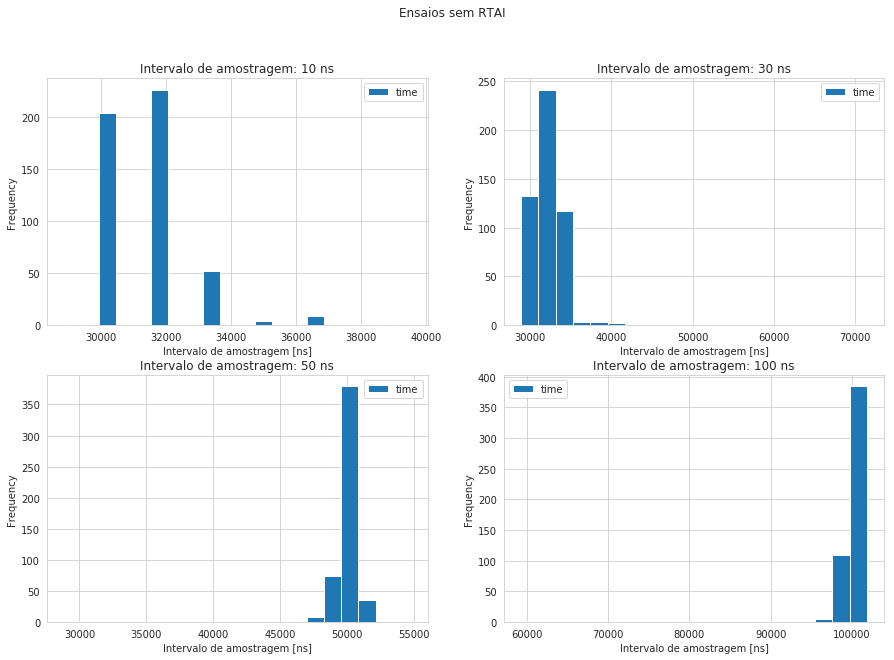

In [160]:
essays = load_essays('TempoRTAI001.txt', 1e10)
plot_essays(essays, [20, 20, 20, 20], title='Ensaios sem RTAI')
d = describe_essays(essays)

df2 = pd.concat(d, axis=0, ignore_index=True)
df2['CV'] = df2['std'] / df2['mean']

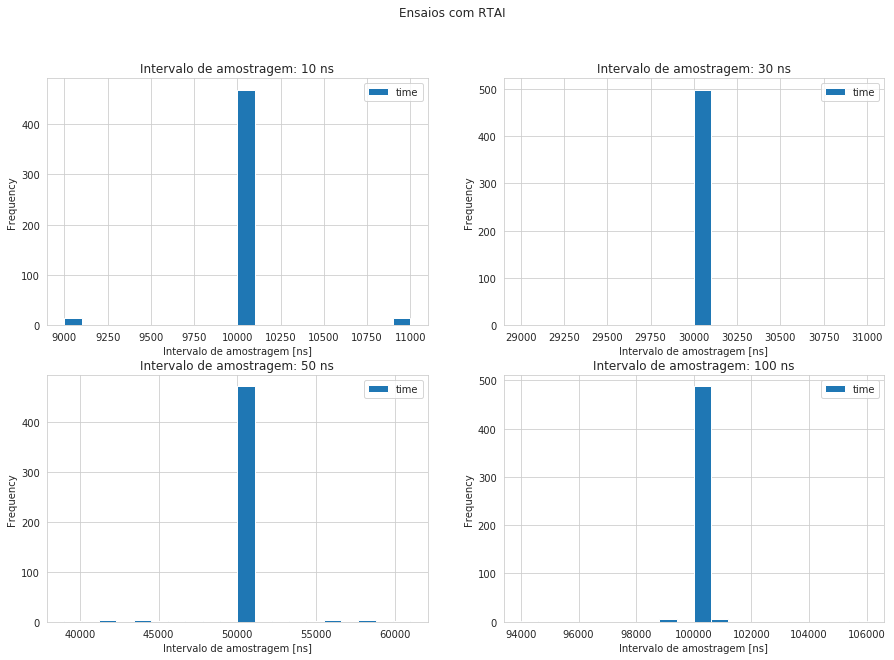

In [161]:
essays = load_essays('TempoSemRtaiTudoNossoGracasADeus.txt', 1e7)
plot_essays(essays, [20, 20, 20, 20], title='Ensaios com RTAI')

d = describe_essays(essays)

df1 = pd.concat(d, axis=0, ignore_index=True)
df1['CV'] = df1['std'] / df1['mean']

# Analise dos resultados

Calculamos estatisticas como média e desvio padrão dos ensaios. Para poder compará-los em escala temos que normalizar, utilizando uma métrica chamada coeficiente de variação:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eef81d283dbe4c44e3e98013ca35c7a4614f1d01)


## Estatisticas
### Com RTAI

In [162]:
df1

,count,mean,std,min,25%,50%,75%,max,CV
0,498.0,10000.0,245.687145,9000.0,10000.0,10000.0,10000.0,11000.0,0.024569
1,499.0,30000.0,63.372425,29000.0,30000.0,30000.0,30000.0,31000.0,0.002112
2,499.0,50000.0,1610.707146,39000.0,50000.0,50000.0,50000.0,61000.0,0.032214
3,499.0,100000.0,405.781511,94000.0,100000.0,100000.0,100000.0,106000.0,0.004058


### Sem RTAI

In [163]:
df2

,count,mean,std,min,25%,50%,75%,max,CV
0,498.0,31584.309237,1318.046340,28880.0,30400.0,31920.0,31920.0,39520.0,0.041731
1,499.0,32087.589178,2294.667437,28880.0,30401.0,31920.0,33440.0,71441.0,0.071513
2,499.0,49907.258517,1512.654408,28880.0,50160.0,50160.0,50160.0,54720.0,0.030309
3,499.0,99921.128257,1972.466749,59280.0,100320.0,100320.0,100320.0,101841.0,0.019740


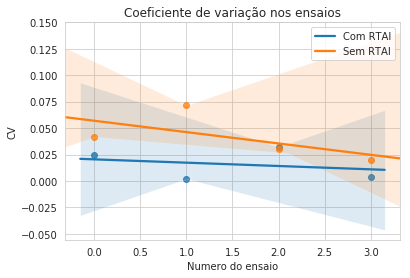

In [164]:
sns.regplot(list(range(len(df1))), df1['CV'])
ax = sns.regplot(list(range(len(df2))), df2['CV']);
ax.set_title('Coeficiente de variação nos ensaios')
ax.set_xlabel('Numero do ensaio')
ax.legend(['Com RTAI', 'Sem RTAI']);

No gráfico acima vemos que não existe uma correlação forte entre o intervalo de amostragem e o coeficiente de variação para o caso com RTAI (na faixa de intervalos de amostragem que testamos), enquanto nos ensaios sem RTAI, vemos uma correlação.

Isso pode ser explicado pela baixa variabilidade dos resultados obtidos com RTAI: Os erros de amostragem não aumentam quando diminuimos o intervalo de amostragem.
